<a href="https://colab.research.google.com/github/PetrusAriaa/modeling-and-simulation-project/blob/master/fish_movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from random import randint
from copy import deepcopy as dc

In [3]:
global EMPTY, NORTH, EAST, SOUTH, WEST, STAY, BORDER

EMPTY = 0
NORTH = 1
EAST = 2
SOUTH = 3
WEST = 4
STAY = 5
BORDER = 6


In [78]:
class Fish():


  def __init__(self, shape:int, n_fishes:int=10):
    self._shape = shape+2
    self._n_fishes = n_fishes
    self._grid = []


  def generate(self):
    self._grid = BORDER*np.ones((self._shape, self._shape))
    for i in range(1, self._shape-1):
      for j in range(1, self._shape-1):
        self._grid[i][j] = 0
    self._summon()
    return self._grid


  def _summon(self):
    for i in range(1, self._shape-1):
      for j in range(1, self._shape-1):
        if random() <= self._n_fishes/((self._shape-2)**2):
          self._grid[i][j] = randint(0, 4)


  def swim(self, time:int=1):
    n = len(self._grid) - 2
    for t in range(time):
      for i in range(1, n+1):
        for j in range(1, n+1):
          Nfish = self._grid[i-1][j]
          Efish = self._grid[i][j+1]
          Sfish = self._grid[i+1][j]
          Wfish = self._grid[i][j-1]
          site = self._grid[i][j]
          crowd_level = [Nfish, Efish, Sfish, Wfish]
          directions = [NORTH, EAST, SOUTH, WEST]
          
          if self._grid[i][j] == NORTH:
            if self._grid[i-1][j] == EMPTY:
              self._grid[i][j] = EMPTY
              self._grid[i-1][j] = np.random.choice([EAST, SOUTH, WEST])
            else:
              minimal_crowd = min(crowd_level)
              preferable = []
              if minimal_crowd == 1:
                for index in range(4):
                  if crowd_level[index] == 1:
                    preferable.append(directions[index])
                self._grid[i][j] = np.random.choice(preferable)
              else:
                self._grid[i][j] = np.random.choice(directions)
          
          if self._grid[i][j] == EAST:
            if self._grid[i][j+1] == EMPTY:
              self._grid[i][j] = EMPTY
              self._grid[i][j+1] = np.random.choice([NORTH, SOUTH, WEST])
            else:
              minimal_crowd = min(crowd_level)
              preferable = []
              if minimal_crowd == 1:
                for index in range(4):
                  if crowd_level[index] == 1:
                    preferable.append(directions[index])
                self._grid[i][j] = np.random.choice(preferable)
              else:
                self._grid[i][j] = np.random.choice(directions)

          if self._grid[i][j] == SOUTH:
            if self._grid[i+1][j] == EMPTY:
              self._grid[i][j] = EMPTY
              self._grid[i+1][j] = np.random.choice([EAST, NORTH, WEST])
            else:
              minimal_crowd = min(crowd_level)
              preferable = []
              if minimal_crowd == 1:
                for index in range(4):
                  if crowd_level[index] == 1:
                    preferable.append(directions[index])
                self._grid[i][j] = np.random.choice(preferable)
              else:
                self._grid[i][j] = np.random.choice(directions)

          if self._grid[i][j] == WEST:
            if self._grid[i][j-1] == EMPTY:
              self._grid[i][j] = EMPTY
              self._grid[i][j-1] = np.random.choice([EAST, SOUTH, NORTH])
            else:
              minimal_crowd = min(crowd_level)
              preferable = []
              if minimal_crowd == 1:
                for index in range(4):
                  if crowd_level[index] == 1:
                    preferable.append(directions[index])
                self._grid[i][j] = np.random.choice(preferable)
              else:
                self._grid[i][j] = np.random.choice(directions)       
    return self._grid


  def sense(self, food_grid):
    n = self._shape - 2
    for i in range(1, n+1):
      for j in range(1, n+1):
        if self._grid[i][j] != EMPTY:
          site = self._grid[i][j]
          Nfood = food_grid[i-1][j]
          Efood = food_grid[i][j+1]
          Sfood = food_grid[i+1][j]
          Wfood = food_grid[i][j-1]
          sense_dir = [Nfood, Efood, Sfood, Wfood]
          fish_dir = [NORTH, EAST, SOUTH, WEST]
          max_sm = max(sense_dir)
          direction = EMPTY
          if site == EMPTY:
            self._grid[i][j] = direction
            continue
          if max_sm > 1:
            for index in range(4):
              if sense_dir[index] == max_sm:
                direction = fish_dir[index]
            self._grid[i][j] = direction
          else:
            continue
    return self._grid

In [129]:
class Food:


  def __init__(self, shape:int):
    self._shape = shape + 2
    self._grid = np.zeros((self._shape, self._shape))
    n = self._shape - 2
    #specify pond area
    for i in range(1, n+1):
      for j in range(1, n+1):
        self._grid[i, j] = 1
  
  def dissolve(self):
    n = self._shape-2
    for i in range(1, n+1):
      for j in range(1, n+1):
        if self._grid[i, j] > 1 and self._grid[i, j] != 100:
          smell_level = self._grid[i, j] - 2
          self._grid[i, j] = max(smell_level, 1)
        if self._grid[i, j] == 100 and self._grid[i-1, j] == 1:
          self._grid[i, j] = 1
    return self._grid


  def get_food_grid(self):
    return self._grid
  
  def reset(self):
    self._grid = np.zeros((self._shape, self._shape))
    n = self._shape - 2
    #specify pond area
    for i in range(1, n+1):
      for j in range(1, n+1):
        self._grid[i, j] = 1
    return self._grid

  def feed(self, x_pos, y_pos):
    n = self._shape-2
    RADIUS = int(self._shape - .5*self._shape)
    smell_level = 2
    if self._grid[y_pos, x_pos] != 0:
      for r in range(0, RADIUS):
        for i in range(y_pos - r, y_pos + r + 1):
          for j in range(x_pos - r, x_pos + r + 1):
            try:
              if i >= 0 and j >= 0:
                if self._grid[i, j] == 1 or smell_level < self._grid[i, j]:
                  self._grid[i, j] = max(self._grid[i, j]+smell_level, 1)
              else:
                continue
            except:
              continue
      self._grid[y_pos, x_pos] = self._shape
    return self._grid

(-0.5, 51.5, 51.5, -0.5)

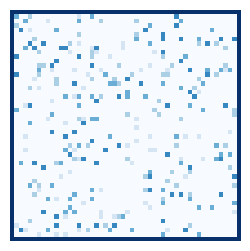

In [143]:
fish = Fish(50, n_fishes=350)
fish_grid = fish.generate()
fig, ax = plt.subplots(figsize=(3,3))
ax.imshow(fish_grid, cmap='Blues')
ax.axis('off')

In [144]:
food = Food(50)
food_grid = food.get_food_grid()

In [121]:
food.feed(40,40)
food.feed(27,25)
food.feed(10,10)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 13., 13., ...,  1.,  1.,  0.],
       [ 0., 13., 15., ...,  1.,  1.,  0.],
       ...,
       [ 0.,  1.,  1., ..., 13., 11.,  0.],
       [ 0.,  1.,  1., ..., 11., 11.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [145]:
food_grid = food.reset()

Text(0.5, 1.0, 'Food map')

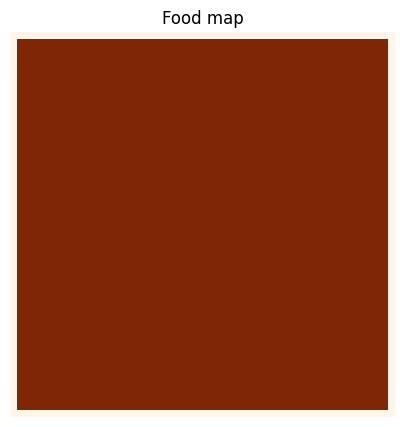

In [146]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(food_grid, cmap='Oranges')
plt.axis('off')
plt.title("Food map")

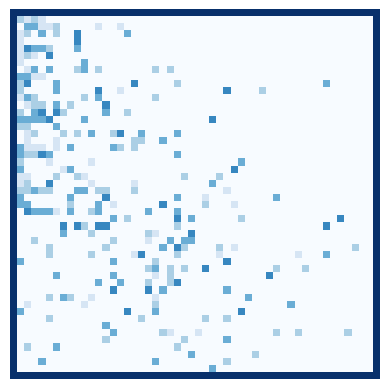

In [147]:
from matplotlib import animation
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
ax.axis('off')

count = 0
def update(i):
  fish.sense(food_grid)
  fish.swim()
  if i == 10:
    food.feed(40,40)
  if i == 40:
    food.feed(27,25)
  if i == 60:
    food.feed(10,10)
  if i%2 == 0:
    food.dissolve()
  im = ax.imshow(fish_grid, cmap='Blues')
  return im,

animate = FuncAnimation(fig, update, repeat=True, frames=200, interval=50)

Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
animate.save('final_result.mp4', writer=writer)

plt.show()